In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [3]:
# Load the dataset
data = pd.read_csv("reduced_dataset.csv")

In [4]:
X = data.drop(columns=["RainTomorrow"])  # Features
y = data["RainTomorrow"]

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# Reshape the data for LSTM input (assuming 3D input)
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))


In [8]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Dense(1, activation='sigmoid'))  # Output layer (binary classification)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_reshaped, y_train, epochs=150, batch_size=32, verbose=1, validation_split=0.2)

Epoch 1/150
2910/2910 [==============================] - 15s 4ms/step - loss: 0.3890 - accuracy: 0.8315 - val_loss: 0.3789 - val_accuracy: 0.8357
Epoch 2/150
2910/2910 [==============================] - 10s 3ms/step - loss: 0.3729 - accuracy: 0.8364 - val_loss: 0.3757 - val_accuracy: 0.8372
Epoch 3/150
2910/2910 [==============================] - 11s 4ms/step - loss: 0.3703 - accuracy: 0.8379 - val_loss: 0.3735 - val_accuracy: 0.8386
Epoch 4/150
2910/2910 [==============================] - 10s 3ms/step - loss: 0.3683 - accuracy: 0.8392 - val_loss: 0.3725 - val_accuracy: 0.8375
Epoch 5/150
2910/2910 [==============================] - 10s 3ms/step - loss: 0.3666 - accuracy: 0.8405 - val_loss: 0.3713 - val_accuracy: 0.8372
Epoch 6/150
2910/2910 [==============================] - 11s 4ms/step - loss: 0.3651 - accuracy: 0.8411 - val_loss: 0.3713 - val_accuracy: 0.8379
Epoch 7/150
2910/2910 [==============================] - 14s 5ms/step - loss: 0.3638 - accuracy: 0.8418 - val_loss: 0.3708 -

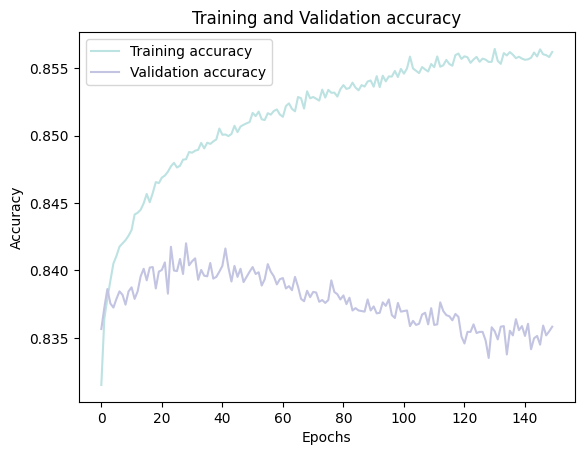

In [10]:
# Plot training and validation accuracy
import matplotlib.pyplot as plt
history_df = pd.DataFrame(history.history)
plt.plot(history_df.loc[:, ['accuracy']], "#BDE2E2", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#C2C4E2", label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [11]:
# Predictions
y_pred_prob = model.predict(X_test_reshaped)
y_pred = (y_pred_prob > 0.5)


910/910 [==============================] - 6s 5ms/step


In [19]:
# Calculate accuracy
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8330812594527706


In [20]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

       False       0.87      0.92      0.90     22672
        True       0.66      0.51      0.57      6420

    accuracy                           0.83     29092
   macro avg       0.76      0.72      0.74     29092
weighted avg       0.82      0.83      0.83     29092



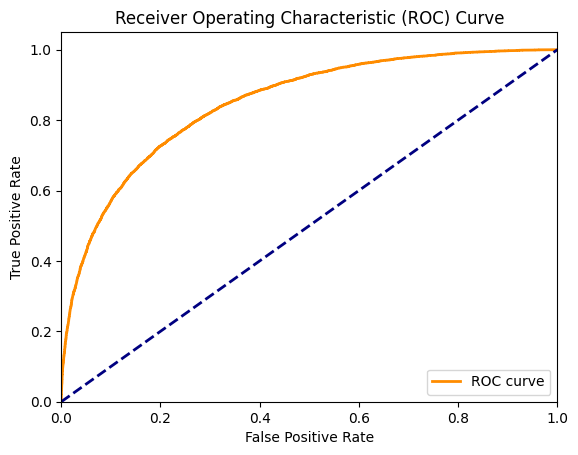

In [21]:
# ROC Curve
from sklearn.metrics import confusion_matrix, classification_report, auc, roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [22]:
# AUC
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)


AUC: 0.8479063028325385


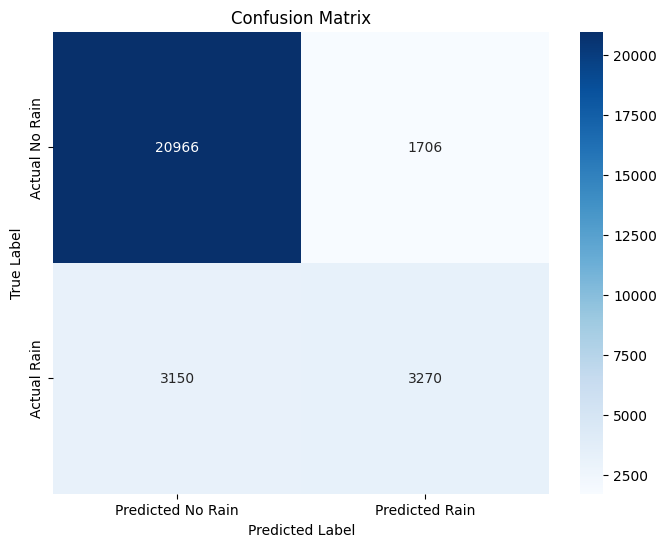

In [23]:
# Confusion matrix
import seaborn as sns
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted No Rain', 'Predicted Rain'],
            yticklabels=['Actual No Rain', 'Actual Rain'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()